# Introduction to PyTorch

## Introduction

In this section we will cover the following topics:

- What is a deep learning, and when do we use it.
- What is a tensor, and how can we represent data with them.
- How can we transform a tensor to fit our needs.

In [69]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
np.random.seed(42)  # for reproducibility

### What is Deep Learning

- Machine learning is turning things (data) into numbers and finding patterns in those numbers.
- Deep learning is a subset of machine learning using neural networks to analyze complex relationships in the data.
- Models can learn patterns through it's
- Deep learning requires extensive amounts of data before it can be useful

### What deep learning is good for

- Problems with long lists of rules— when the traditional approach fails, machine learning/deep learning may help.

- Continually changing environments— deep learning can adapt ('learn') to new scenarios.

- Discovering insights within large collections of data— when the dataset is too big, it might be better to use a deep learning model instead of observing the entire data.

### What deep learning is (typically) not good for

- “If you can build a simple rule-based system that doesn’t require machine learning, do that." - [Rules of Machine Learning](https://developers.google.com/machine-learning/guides/rules-of-ml/)

- When you need explainability- the patterns learned by a deep learning model are typically uninterpretable by a human.

- When errors are unacceptable— since the outputs of deep learning model aren’t always predictable.

- When you don’t have much data— deep learning models usually require a fairly large amount of data to produce great results.

### What is a neural network

- A neural network takes in numerical values (often times in the form of a tensor)

- It learns the representation (adjusts weights/learn features/patterns)

- Produces an output tensor that is Human Interpretable

![NeuralNetworkDemo](media/neural_net.gif)

### What is PyTorch

- Most [popular](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/) research deep learning framework

- Write fast deep learning code in Python (able to run natively on many GPUs)

- Able to access many pre-built deep learning models TorchHub/[torchvision.models](https://docs.pytorch.org/vision/stable/models.html)

### What is a Tensor

A Tensor is the basic building block. Similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU.

In [70]:
x = torch.tensor([5.0, 3, 6.6, 1])

- They have NumPy-like behaviour for array operations - not a regular Python list.

In [71]:
x + 1

tensor([6.0000, 4.0000, 7.6000, 2.0000])

- *PyTorch* tensors can be on your CPU or GPU. You can explicitly copy it back and forth.  We will look into this more later.

### Gradients

- PyTorch tensors are more powerful than NumPy ndarrays when we are interested in propagating gradients.

- Neural networks are trained via two operations:

  - a forward pass

  - a backward pass

- Both the gradient, and forward and backward pass functions are attached to PyTorch's Tensor object.

Setting **require_grad=True** makes PyTorch track all the operations on that Tensor. When you finish the computation, you can call .backward() on it and the gradients are stored in the **.grad** attribute.

In [72]:
x = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)
x

tensor([4., 5., 6.], requires_grad=True)

In [73]:
x = x + 4

In [74]:
x

tensor([ 8.,  9., 10.], grad_fn=<AddBackward0>)

If you don't want to track gradients, you can put code inside a **with torch.no_grad()** block. This saves memory.

In [75]:
with torch.no_grad():
    x = x * 2

In [76]:
x

tensor([16., 18., 20.])

## Datasets

- We will only cover this briefly, as this code will be provided for you. It is helpful to know generally how it works.

- **Transforms** are common image transformations which can be chained together using Compose().

- List of common [transforms](https://docs.pytorch.org/vision/0.11/transforms.html)

In [77]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

- Certain commonly-used public datasets are available directly via PyTorch, through **torchvision.datasets**.

- Listing of all available datasets here: https://pytorch.org/docs/stable/torchvision/datasets.html

In [78]:
train_set = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_set = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

Data loaders are provided by **torch.utils.data** and help for easy iteration over datasets.

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [79]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True,
    num_workers=2
)


test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=24, # Forward pass only so batch size can be larger
    shuffle=False,
    num_workers=2
)

classes = np.arange(0, 10)

To iterate over the test set, one batch at a time, we do the following:

In [80]:
# 24 images at a time
for i, data in enumerate(test_loader, 0):
    images, labels = data
    print("Batch", i, "size:", len(images))

    break # Do something

Batch 0 size: 24


Note that the length of a loader is the *number of batches*, not the total number of images.

In [81]:
len(test_loader)

417

If you want to look at the images in the set one by one, you can define a loader with batch_size of 1 and iterate over it using an iterator.

In [82]:
visual_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=1,
    shuffle=False,
)

iterator = iter(visual_loader)

tensor([7])


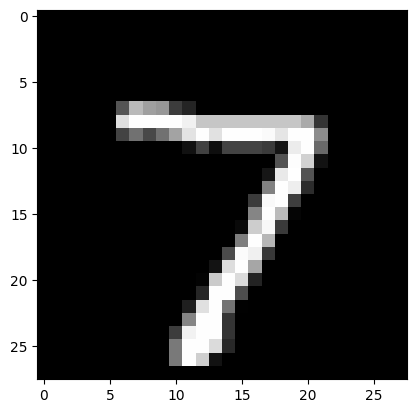

In [83]:
image, label = next(iterator)
plt.imshow(image.flatten().reshape(28, 28), cmap='gray')
print(label)

tensor([2])


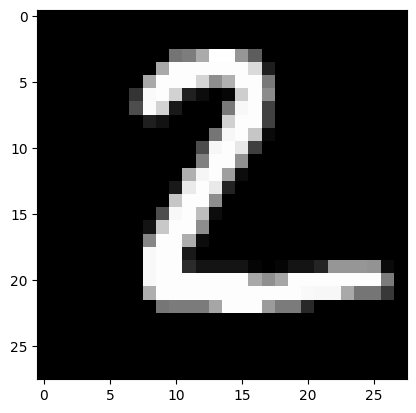

In [84]:
image, label = next(iterator)
plt.imshow(image.flatten().reshape(28, 28), cmap='gray')
print(label)

### Exercise:

1. Create two tensor that holds 5 values with `requires_grad=True`. Multiply them together and check what the `grad_fn` is.

2. Using the `visual_loader`, display a handwritten `4`.